<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Assignment:  Machine Learning Prediction


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

We will import the following libraries for the lab


In [2]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

<ipython-input-2-b7d446354769>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


This function is to plot the confusion matrix.


In [3]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [4]:
from js import fetch
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = await fetch(URL1)
text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
data = pd.read_csv(text1)

In [5]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [5]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = await fetch(URL2)
text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
X = pd.read_csv(text2)

In [9]:
X.shape

(90, 83)

In [6]:
X.head()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [7]:
Y = data['Class'].to_numpy()
Y[0:10]

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [8]:
len(Y)

90

## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [10]:
# students get this 
transform = preprocessing.StandardScaler()
transform

StandardScaler()

In [11]:
X = transform.fit_transform(X)

In [14]:
X[0]

array([-1.71291154e+00, -1.94814463e-16, -6.53912840e-01, -1.57589457e+00,
       -9.73440458e-01, -1.05999788e-01, -1.05999788e-01, -6.54653671e-01,
       -1.05999788e-01, -5.51677284e-01,  3.44342023e+00, -1.85695338e-01,
       -3.33333333e-01, -1.05999788e-01, -2.42535625e-01, -4.29197538e-01,
        7.97724035e-01, -5.68796459e-01, -4.10890702e-01, -4.10890702e-01,
       -1.50755672e-01, -7.97724035e-01, -1.50755672e-01, -3.92232270e-01,
        9.43398113e+00, -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
       -1.05999788e-01, -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
       -1.05999788e-01, -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
       -1.05999788e-01, -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
       -1.05999788e-01, -1.05999788e-01, -1.05999788e-01, -1.50755672e-01,
       -1.05999788e-01, -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
       -1.05999788e-01, -1.50755672e-01, -1.05999788e-01, -1.50755672e-01,
       -1.50755672e-01, -

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.2, random_state = 2)

we can see we only have 18 test samples.


In [16]:
Y_test.shape

(18,)

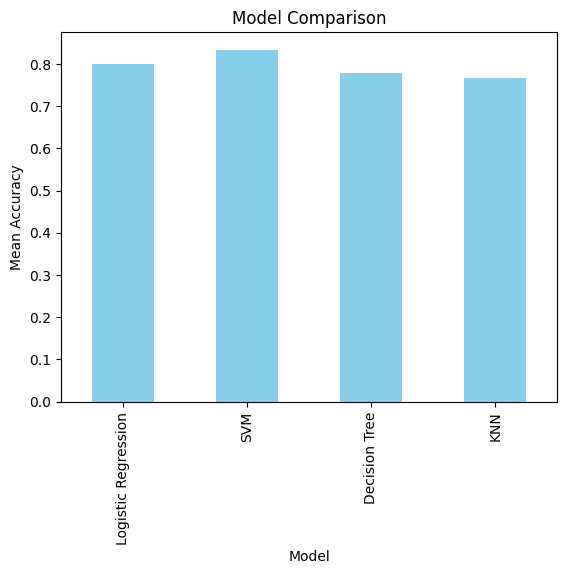

In [19]:
#Trying to test all models in one go
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score  # Importing cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier()
}
results = {}
for model_name, model in models.items():
    # Perform 10-fold cross-validation using standardized data and the target
    scores = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
    results[model_name] = scores.mean()

# Convert the results dictionary into a pandas Series for easy plotting
results_series = pd.Series(results)

# Plot the results as a bar plot
results_series.plot(kind='bar', color='skyblue')
plt.title('Model Comparison')
plt.ylabel('Mean Accuracy')
plt.xlabel('Model')
plt.show()




Best parameters for Logistic Regression: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validation score for Logistic Regression: 0.8222222222222222
Best parameters for SVM: {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
Best cross-validation score for SVM: 0.8222222222222223


/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/lib/python3.12/site-packages/sklearn/utils/_param_validation.py", line 95, in validate_p

Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
Best cross-validation score for Decision Tree: 0.9
Best parameters for KNN: {'algorithm': 'auto', 'n_neighbors': 5, 'p': 1}
Best cross-validation score for KNN: 0.8444444444444444


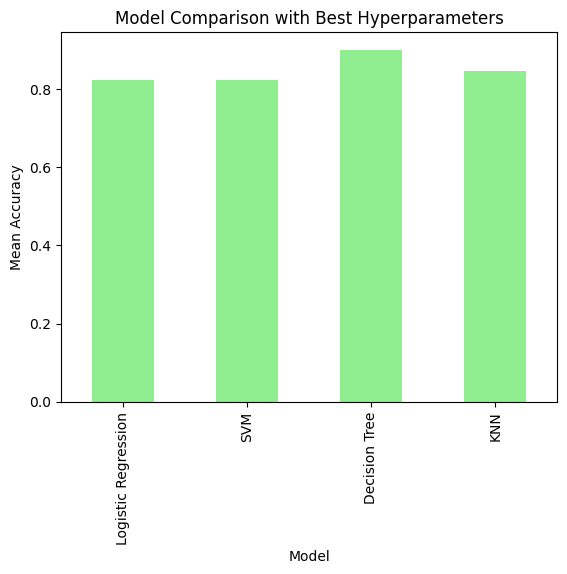

In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
# Define hyperparameters for each model
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1],
        'penalty': ['l2'],
        'solver': ['lbfgs']
    },
    'SVM': {
        'kernel': ('linear', 'rbf', 'poly', 'sigmoid'),
        'C': np.logspace(-3, 3, 5),
        'gamma': np.logspace(-3, 3, 5)
    },
    'Decision Tree': {
        'criterion': ['gini', 'entropy'],
        'splitter': ['best', 'random'],
        'max_depth': [2*n for n in range(1, 10)],
        'max_features': ['auto', 'sqrt'],
        'min_samples_leaf': [1, 2, 4],
        'min_samples_split': [2, 5, 10]
    },
    'KNN': {
        'n_neighbors': list(range(1, 11)),
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'p': [1, 2]
    }
}

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier()
}
best_scores = {}
best_params = {}

for model_name in models.keys():
    grid_search = GridSearchCV(estimator=models[model_name], param_grid=param_grids[model_name], cv=10, scoring='accuracy')
    grid_search.fit(X, Y)
    
    # Store the best score and parameters
    best_scores[model_name] = grid_search.best_score_
    best_params[model_name] = grid_search.best_params_
    
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation score for {model_name}: {grid_search.best_score_}")
# Convert the results dictionary into a pandas Series for easy plotting
scores_series = pd.Series(best_scores)

# Plot the results as a bar plot
scores_series.plot(kind='bar', color='lightgreen')
plt.title('Model Comparison with Best Hyperparameters')
plt.ylabel('Mean Accuracy')
plt.xlabel('Model')
plt.show()


In [22]:
#decision tree has the highest accuracy, test it on train/test split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
#train the decision tree on trainig dat
best_tree = DecisionTreeClassifier(**best_params['Decision Tree'])  # Using the best parameters found from GridSearchCV
best_tree.fit(X_train, y_train)
#evaluate on test data
test_accuracy = best_tree.score(X_test, y_test)
print(f"Test Accuracy of Decision Tree: {test_accuracy}")



Test Accuracy of Decision Tree: 0.9444444444444444


In [23]:
#the decision tree model holds it's accuracy value ont test data as well, now assess it further
# confusion matrixm f1 score...
from sklearn.metrics import classification_report, confusion_matrix

y_pred = best_tree.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 5  1]
 [ 0 12]]
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.92      1.00      0.96        12

    accuracy                           0.94        18
   macro avg       0.96      0.92      0.93        18
weighted avg       0.95      0.94      0.94        18



Classification Report

The classification report provides detailed performance metrics for each class:
For Class 0 (Negative Class):

    Precision: 1.00
        This means that out of all the predictions the model made for class 0, 100% were correct

    Recall: 0.83
        This indicates that the model correctly identified 83% of the actual class 0 instances.

    F1-score: 0.91
        The F1-score is the harmonic mean of precision and recall, which balances the two metrics.
    Support: 6
        This is the number of actual occurrences of class 0 in the test set.

For Class 1 (Positive Class):

    Precision: 0.92
        Out of all the predictions the model made for class 1, 92% were correct.
    Recall: 1.00
        This indicates that the model correctly identified 100% of the actual class 1 instances.
    F1-score: 0.96
        The F1-score is the harmonic mean of precision and recall for class 1.
    Support: 12
        This is the number of actual occurrences of class 1 in your test set.

Overall Metrics

    Accuracy: 0.94
        This means that the model correctly predicted 94% of all instances in the test set.
    Macro Average:
        Precision: 0.96
            The average precision of both classes.
        Recall: 0.92
            The average recall of both classes.
        F1-score: 0.93
            The average F1-score of both classes.

    Weighted Average:
        Precision: 0.95
            This takes into account the support (number of instances) for each class.
        Recall: 0.94
            A weighted average of recall.
        F1-score: 0.94
            A weighted average of the F1-score.

Interpretation:

    Class 0 (Negative Class): The model is very precise (100%) but has a lower recall (83%), meaning it's very good at predicting class 0 when it does, but it misses some actual class 0 instances.

    Class 1 (Positive Class): The model has a high recall (100%) and a good precision (92%), meaning it correctly identifies all class 1 instances but occasionally misclassifies a class 0 as class 1.

    Overall: The model performs well, with a high accuracy of 94%, indicating that it's generally reliable for predicting both classes. The high F1-scores show a good balance between precision and recall.

This suggests that the model is well-suited for the task, particularly for class 1, but might want to be cautious if missing a class 0 prediction is costly.

#Plot the confusion matrix using sns..
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


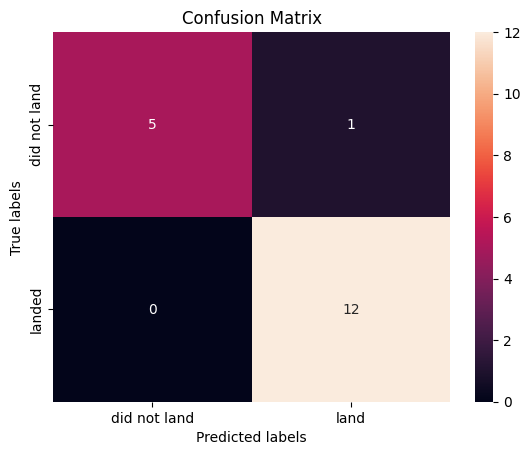

In [25]:
#plot confusion matrix using the helper function defined earlier.
plot_confusion_matrix(Y_test,y_pred)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [13]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [14]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
# Create the GridSearchCV object with 10-fold cross-validation
logreg_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=10)

# Fit the GridSearchCV object to the data
logreg_cv.fit(X, Y)

# To view the best parameters found
print("Best parameters found: ", logreg_cv.best_params_)


Best parameters found:  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}


We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [15]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8222222222222222


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [16]:
# Calculate the accuracy on the test data
accuracy = logreg_cv.score(X_test, Y_test)

# Print the accuracy
print("Accuracy on test data: {:.2f}%".format(accuracy * 100))


Accuracy on test data: 94.44%


Lets look at the confusion matrix:


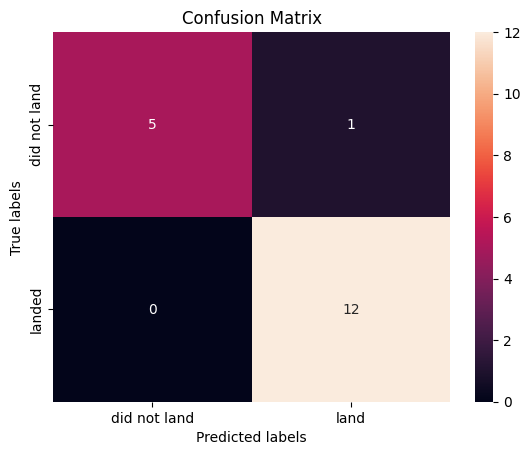

In [17]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the major problem is false positives.


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [18]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [19]:
import numpy as np
from sklearn import svm
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters for tuning
parameters = {
    'kernel': ('linear', 'rbf', 'poly', 'sigmoid'),
    'C': np.logspace(-3, 3, 5),
    'gamma': np.logspace(-3, 3, 5)
}

# Create a support vector machine (SVM) object
svm = SVC()

# Create the GridSearchCV object with 10-fold cross-validation
svm_cv = GridSearchCV(estimator=svm, param_grid=parameters, cv=10)

# Fit the GridSearchCV object to the data
svm_cv.fit(X, Y)

# To view the best parameters found
print("Best parameters found: ", svm_cv.best_params_)

# To view the best score achieved
print("Best cross-validation score: ", svm_cv.best_score_)


Best parameters found:  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
Best cross-validation score:  0.8222222222222223


In [20]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8222222222222223


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [21]:
#svm_cv.score(X_test, Y_test)
# Calculate the accuracy on the test data
accuracy = svm_cv.score(X_test, Y_test)

# Print the accuracy
print("Accuracy on test data: {:.2f}%".format(accuracy * 100))


Accuracy on test data: 94.44%


We can plot the confusion matrix


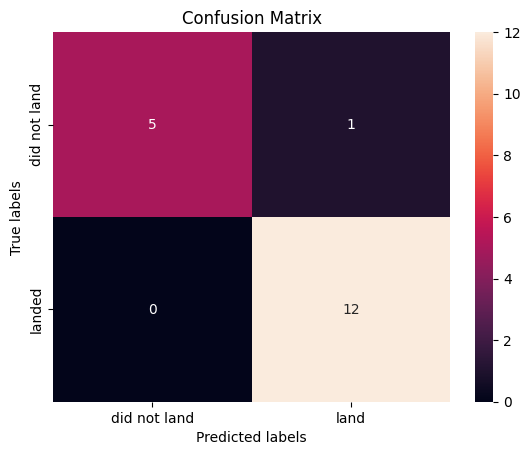

In [22]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [23]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [24]:

# Create the GridSearchCV object with 10-fold cross-validation
tree_cv = GridSearchCV(estimator=tree, param_grid=parameters, cv=10)

# Fit the GridSearchCV object to the data
tree_cv.fit(X, Y)

# To view the best parameters found
print("Best parameters found: ", tree_cv.best_params_)

# To view the best score achieved
print("Best cross-validation score: ", tree_cv.best_score_)


/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/lib/python3.12/site-packages/sklearn/utils/_param_validation.py", line 95, in validate_p

Best parameters found:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'random'}
Best cross-validation score:  0.9


In [25]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'random'}
accuracy : 0.9


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [26]:
accuracy = tree_cv.score(X_test, Y_test)
accuracy

0.9444444444444444

We can plot the confusion matrix


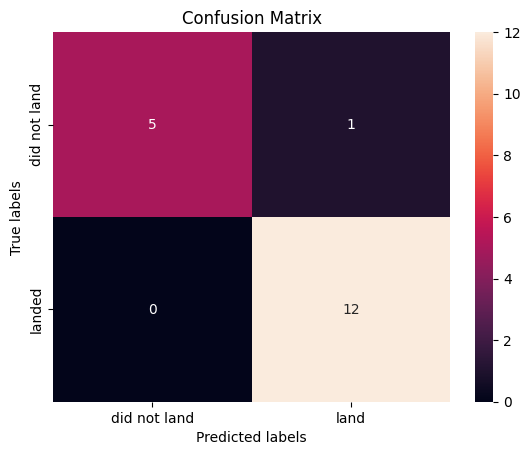

In [27]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [28]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [29]:
# Create the GridSearchCV object with 10-fold cross-validation
knn_cv = GridSearchCV(estimator=KNN, param_grid=parameters, cv=10)

# Fit the GridSearchCV object to the data
knn_cv.fit(X, Y)

# To view the best parameters found
print("Best parameters found: ", knn_cv.best_params_)

# To view the best score achieved
print("Best cross-validation score: ", knn_cv.best_score_)


Best parameters found:  {'algorithm': 'auto', 'n_neighbors': 5, 'p': 1}
Best cross-validation score:  0.8444444444444444


In [30]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 5, 'p': 1}
accuracy : 0.8444444444444444


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [31]:
accuracy = knn_cv.score(X_test, Y_test)
accuracy

0.9444444444444444

We can plot the confusion matrix


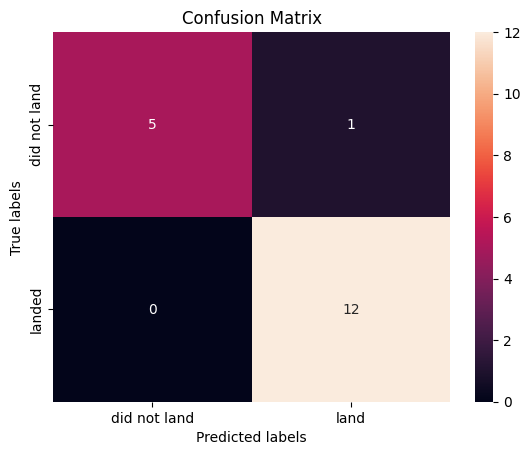

In [32]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  12


Find the method performs best:


In [33]:
# Assuming you have already fitted your models as knn_cv, tree_cv, and svm_cv

# Print cross-validation scores
print("Best cross-validation score for KNN: ", knn_cv.best_score_)
print("Best cross-validation score for Decision Tree: ", tree_cv.best_score_)
print("Best cross-validation score for SVM: ", svm_cv.best_score_)
print("Best cross-validation score for Logistic Regression: ", logreg_cv.best_score_)


Best cross-validation score for KNN:  0.8444444444444444
Best cross-validation score for Decision Tree:  0.9
Best cross-validation score for SVM:  0.8222222222222223
Best cross-validation score for Logistic Regression:  0.8222222222222222


In [34]:
#After fitting the best models on the training data, evaluate them on the test set:
# Assuming X_test and y_test are your test data

# Evaluate KNN
knn_best = knn_cv.best_estimator_
knn_test_score = knn_best.score(X_test, Y_test)
print("Test accuracy for KNN: ", knn_test_score)

# Evaluate Decision Tree
tree_best = tree_cv.best_estimator_
tree_test_score = tree_best.score(X_test, Y_test)
print("Test accuracy for Decision Tree: ", tree_test_score)

# Evaluate SVM
svm_best = svm_cv.best_estimator_
svm_test_score = svm_best.score(X_test, Y_test)
print("Test accuracy for SVM: ", svm_test_score)

# Evaluate Logistic Regression
logreg_best = logreg_cv.best_estimator_
logreg_test_score = logreg_best.score(X_test, Y_test)
print("Test accuracy for Logistic Regression: ", logreg_test_score)


Test accuracy for KNN:  0.9444444444444444
Test accuracy for Decision Tree:  0.9444444444444444
Test accuracy for SVM:  0.9444444444444444
Test accuracy for Logistic Regression:  0.9444444444444444


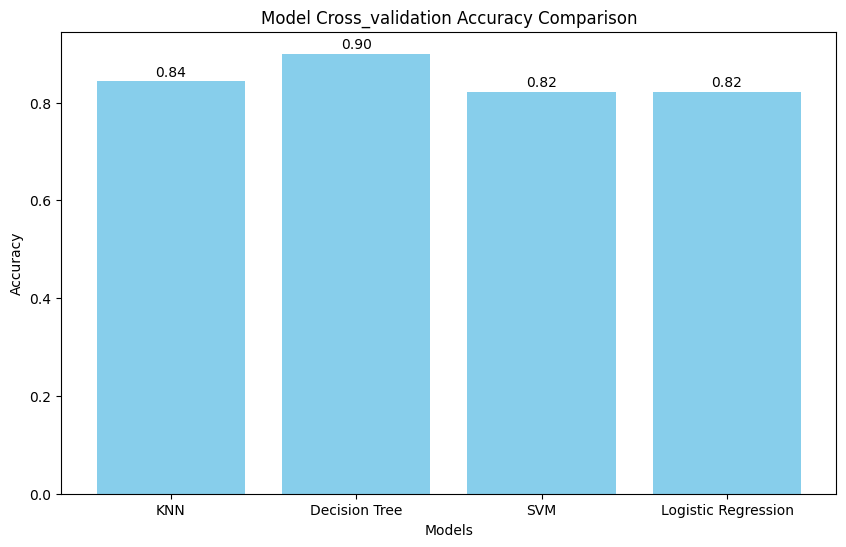

In [40]:
# plot the accuracy of the models
import matplotlib.pyplot as plt

# Store the model names and their corresponding test accuracies in lists
models = ['KNN', 'Decision Tree', 'SVM', 'Logistic Regression']
accuracies = [knn_cv.best_score_, tree_cv.best_score_, svm_cv.best_score_, logreg_cv.best_score_]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')

# Add titles and labels
plt.title('Model Cross_validation Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')

# Add the accuracy values on top of the bars
for i in range(len(models)):
    plt.text(i, accuracies[i] + 0.01, f'{accuracies[i]:.2f}', ha='center')

# Show the plot
plt.show()
import matplotlib.pyplot as plt


In [35]:
#For a more comprehensive evaluation, consider calculating additional metrics like precision, recall, and F1-score:
from sklearn.metrics import classification_report

# Predict and evaluate KNN
knn_y_pred = knn_best.predict(X_test)
print("Classification report for KNN:\n", classification_report(Y_test, knn_y_pred))

# Predict and evaluate Decision Tree
tree_y_pred = tree_best.predict(X_test)
print("Classification report for Decision Tree:\n", classification_report(Y_test, tree_y_pred))

# Predict and evaluate SVM
svm_y_pred = svm_best.predict(X_test)
print("Classification report for SVM:\n", classification_report(Y_test, svm_y_pred))

# Predict and evaluate Logistic Regression
logreg_y_pred = logreg_best.predict(X_test)
print("Classification report for Logistic Regression:\n", classification_report(Y_test, logreg_y_pred))


Classification report for KNN:
               precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.92      1.00      0.96        12

    accuracy                           0.94        18
   macro avg       0.96      0.92      0.93        18
weighted avg       0.95      0.94      0.94        18

Classification report for Decision Tree:
               precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.92      1.00      0.96        12

    accuracy                           0.94        18
   macro avg       0.96      0.92      0.93        18
weighted avg       0.95      0.94      0.94        18

Classification report for SVM:
               precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.92      1.00      0.96        12

    accuracy                           0.94        18
   macro avg       0.9

In [36]:
#already plotted up top
#Plot confusion matrices for a visual comparison of model performance:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

# Plot confusion matrix for KNN
plot_confusion_matrix(knn_best, X_test, y_test)
plt.title("Confusion Matrix for KNN")
plt.show()

# Plot confusion matrix for Decision Tree
plot_confusion_matrix(tree_best, X_test, y_test)
plt.title("Confusion Matrix for Decision Tree")
plt.show()

# Plot confusion matrix for SVM
plot_confusion_matrix(svm_best, X_test, y_test)
plt.title("Confusion Matrix for SVM")
plt.show()

# Plot confusion matrix for Logistic Regression
plot_confusion_matrix(logreg_best, X_test, y_test)
plt.title("Confusion Matrix for Logistic Regression")
plt.show()


<class 'ImportError'>: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/lib/python3.12/site-packages/sklearn/metrics/__init__.py)

## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
